<a href="https://colab.research.google.com/github/AlyssaMulia/Post-test-data-mining/blob/main/POST_TEST_DATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI KEBERLANJUTAN PRODUK FASHION DENGAN MENGGUNAKAN KATEGORI MATERIAL DAN FAKTOR PRODUKSI**

### **Studi Kasus**

Pakaian adalah salah satu penyumbang polusi terbesar pada lingkungan. 10% emisi karbondioksida global dihasilkan oleh industri *fashion*. Selain itu produksi dari tekstil memberikan dampak terhadap lingkungan dan perairan. Sekitar setengah dari semua tekstil terbuat dari katun yang dimana dalam proses produksinya menggunakan banyak bahan kimia. Mencuci bahan tekstil yang berbahan dasar plastik juga dapat melepaskan serat mikro (microfibers). Artinya serat mikro plastik tersebut mengalir di air hingga berakhir ke sungai dan lautan.

Tentunya hal ini membahayakan ekosistem yang berada didalamnya. *fashion* berkelanjutan bertujuan untuk memperbaiki proses produksi pakaian sehingga lebih ramah terhadap lingkungan, mengurangi polusi, serta mengurangi penggunaan bahan-bahan berbahaya. Selain itu, fashion berkelanjutan juga mencakup penggunaan material ramah lingkungan dan praktik produksi yang mengurangi jejak karbon.

# **Import Library**

**Core Library**

In [1826]:
from google.colab import userdata
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Library untuk Splitting Data**

In [1827]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [1828]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [1829]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics

# **Business Understanding**

### **Business Objective**

Tujuan utama dari analisis ini adalah untuk mempresiksi apakah sebuah brand dalam proses pembuatan produknya sudah ramah lingkungan dan memberikan rekomendasi untuk meningkatkannya. Dengan memprediksi keberlanjutan secara akurat, perusahaan dapat menyesuaikan pilihan bahan dan proses produksi untuk memperbaiki dampak lingkungan, serta merancang strategi produksi yang lebih ramah lingkungan dan berkelanjutan.

### **Assess Situation**

*Fashion* adalah salah satu industri dengan dampak lingkungan terbesar. Tantangan seperti pemilihan bahan, tingginya emisi karbon, konsumsi air yang besar, dan limbah tekstil menjadi masalah utama untuk mencapai brand fashion yang ramah lingkungan dan berkelanjutan

### **Data Mining Goals**

Tujuan data mining dalam dataset ini yaitu membangun model prediktif untuk memperkirakan apakah sebuah brand ramah lingkungan berdasarkan faktor-faktornya seperti bahan yang digunakan, jejak karbon, jenis sertifikasi, program daur ulang, dan atribut pendukung lainnya.

### **Project Plan**

Rencana proyek dalam menganalisis dataset ini dimulai dengan mengumpulkan data dari berbagai produk. Langkah awal dilakukan dengan memahami struktur data dan melakukan pembersihan terhadap data yang tidak relevan. Selanjutnya dilakukan proses eksplorasi dan reduksi data dengan fokus pada atribut-atribut penting. Tujuan akhir dari proyek ini adalah untuk memprediksi apakah suatu produk fashion merupakan produk yang ramah lingkungan. Hasil prediksi ini diharapkan dapat digunakan oleh pelaku industri fashion untuk meningkatkan praktik produksi yang ramah lingkungan dan mendapatkan rating keberlanjutan yang lebih baik.

# **Data Understanding**

### **Collect Initial Data**

Data yang digunakan dalam penelitian ini diperoleh dari platform **Kaggle**. Dataset ini berjudul **Sustainable Fashion Trends 2024**, yang memuat informasi mengenai  brand fashion dari berbagai negara beserta atribut-atribut yang mencerminkan praktik keberlanjutan mereka.

Dataset mencakup variabel-variabel seperti jenis bahan yang digunakan, tingkat emisi karbon, volume penggunaan air, sertifikasi keberlanjutan, praktik manufaktur ramah lingkungan, dan program daur ulang.

Dataset URL = [Sustainable Fashion: Eco-Friendly Trends](https://www.kaggle.com/datasets/waqi786/sustainable-fashion-eco-friendly-trends/data)

In [1830]:
df = pd.read_csv('https://raw.githubusercontent.com/AlyssaMulia/Post-test-data-mining/refs/heads/main/sustainable_fashion_trends_2024.csv')
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


###**Describe Data**

#####**Informasi Dasar**

In [1831]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 5000
Jumlah kolom: 15


Dataset ini berisi 5000 merek atau produk *fashion*, dengan masing-masing memiliki 18 atribut keberlanjutan yaitu id merek, nama merek, kota, tahun, rating keberlanjutan, jenis bahan, produksi ramah lingkungan, jejak karbon, penggunaan air, limbah produksi, lini produk, rata-rata harga, tren pasar, dan sertifikasi.

##### **Informasi Lanjutan**

In [1832]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

Dataset ini berfokus pada faktor-faktor utama *fashion* yang berkelanjutan dan ramah lingkungan. Dataset ini berbentuk file csv dengan 5000 brand dan 15 kolom sebagai berikut:

1. **Brand_ID**: ID unik untuk setiap merek *fashion*. Berisi 5000 baris dengan tipe data object.
2. **Brand Name**: Nama merek *fashion*. Berisi 5000 baris dengan tipe data object.
3. **Country**: Negara asal merek tersebut berada. Berisi 5000 baris dengan tipe data object.
4. **Year**: Tahun dikumpulkannya data. Berisi 5000 baris dengan tipe data int64.
5. **Sustainability Rating**: Skor atau peringkat keberlanjutan dari brand. Berisi 5000 baris dengan tipe data object.
6. **Material Type**: Jenis bahan utama yang digunakan dalam produk. Berisi 5000 baris dengan tipe data object.
7. **Eco Friendly Manufacturing**: Indikator apakah proses produksi brand tersebut ramah lingkungan atau tidak. Berisi 5000 baris dengan tipe data object.
8. **Carbon Footprint (MT)**: Jumlah emisi karbon yang dihasilkan oleh brand dalam satuan metrik ton (MT). Berisi 5000 baris dengan tipe data float64.
9. **Water Usage (Liters)**: Jumlah air yang digunakan selama proses produksi, dalam satuan liter. Berisi 5000 baris dengan tipe data float64.
10. **Waste Production (KG)**: Banyaknya limbah padat yang dihasilkan selama produksi, dalam kilogram. Berisi 5000 baris dengan tipe data float64.
11. **Recycling Programs**: Menunjukkan apakah brand memiliki program daur ulang (recycling) produk atau bahan. Berisi 5000 baris dengan tipe data object.
12. **Product Lines**: Jenis atau jumlah lini produk yang dimiliki. Berisi 5000 baris dengan tipe data int64.
13. **Average Price (USD)**: Harga rata-rata produk brand tersebut dalam dolar AS. Berisi 5000 baris dengan tipe data float64.
14. **Market Trend**: Tren pasar untuk brand tersebut. Berisi 5000 baris dengan tipe data object.
15. **Certifications**: Sertifikasi keberlanjutan yang dimiliki brand, seperti GOTS, OEKO-TEX, Fair Trade, B Corp yang menunjukkan kepatuhan terhadap standar global. Berisi 3996 baris terisi dengan tipe data object.

##### **Statistika Deskriptif**

In [1833]:
df.describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


1.   **Year**
  * Mean: Tahun rata-rata data adalah sekitar 2016.96, artinya mayoritas data berasal dari sekitar tahun 2017.
  * Min – Max: Data dikumpulkan mulai dari tahun 2010 hingga 2024.
  * Std (standar deviasi): ±4.35 tahun, menunjukkan distribusi waktu yang cukup tersebar.

2.   **Carbon_Footprint_MT**
  * Mean: Rata-rata emisi karbon brand adalah sekitar 250.32 MT.
  * Min – Max: Terendah 1.04 MT, tertinggi 499.93 MT, menunjukkan rentang yang sangat besar antar brand.
  * Std: ±142.80, mengindikasikan variasi signifikan dalam emisi karbon antar brand.

3. **Water_Usage_Liters**
  * Mean: Rata-rata penggunaan air adalah 2.5 juta liter.
  * Min – Max: Terendah sekitar 50 ribu liter, tertinggi hampir 5 juta liter.
  * Std: ±1.42 juta liter, menunjukkan brand-brand memiliki kebutuhan air yang sangat bervariasi.

4. **Waste_Production_KG**
  * Mean: Sekitar 50,107 kg limbah yang dihasilkan rata-rata oleh tiap brand.
  * Min – Max: Rentangnya dari 1.026 kg hingga hampir 100 ribu kg, yang lagi-lagi memperlihatkan perbedaan besar antar brand.
  * Std: ±28,746 kg – tingkat variasinya sangat tinggi
5. **Product_Lines**
  * Mean: Sekitar 10 produk/lini per brand.
  * Min – Max: Dari 1 hingga 20 lini produk.
  * Std: ±5.7 – cukup tersebar, beberapa brand sangat fokus, lainnya lebih luas cakupannya.
6. **Average_Price_USD**
  * Mean: Sekitar $259.35 USD.

  * Min – Max: Mulai dari produk dengan harga 20.02 dolar hingga 499.94 dolar.
  * Std: ±137.73 – menunjukkan penyebaran harga cukup besar.



### **Exploratory Data Analysis**

##### **Distribution**

Distribusi Jejak Karbon

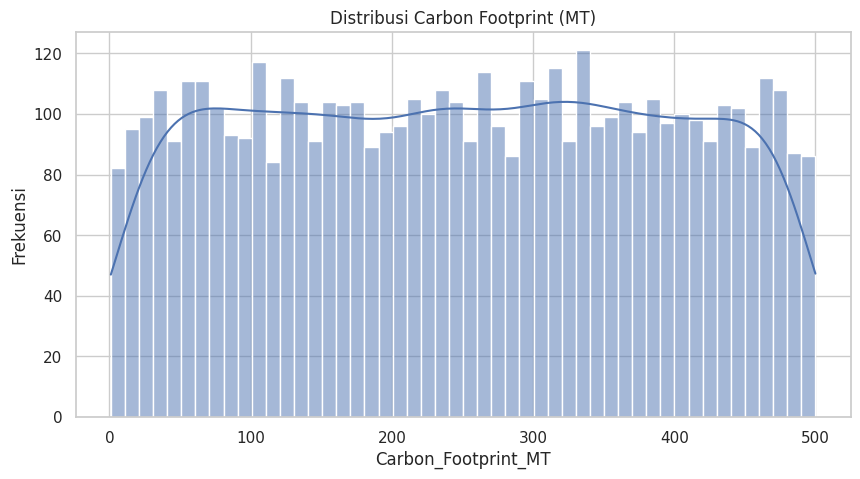

In [1834]:
sns.set(style="whitegrid")

data=df

plt.figure(figsize=(10, 5))
sns.histplot(df['Carbon_Footprint_MT'], kde=True, bins=50)
plt.title("Distribusi Carbon Footprint (MT)")
plt.xlabel("Carbon_Footprint_MT")
plt.ylabel("Frekuensi")
plt.show()

Dari distribusi di atas, terlihat bahwa distribusi Carbon_Footprint_MT miring ke kanan (positively skewed). Artinya, sebagian besar brand memiliki jejak karbon yang lebih rendah, tetapi ada beberapa yang sangat tinggi dan menjadi outlier ke arah kanan.,

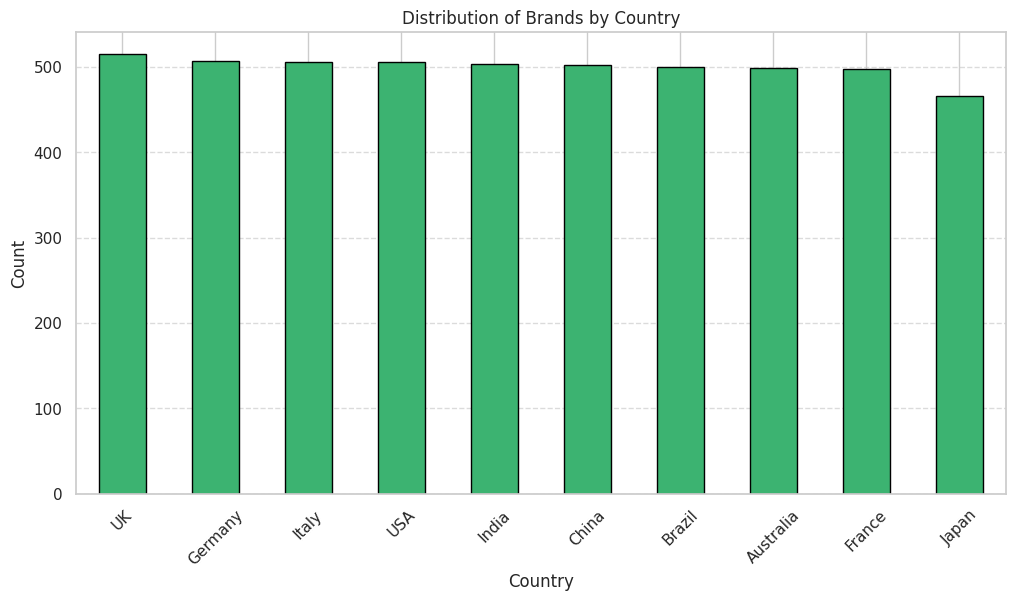

In [1835]:
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Brands by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dapat dilihat bahwa distribusi merek *fashion* berdasarkan negara cukup merata

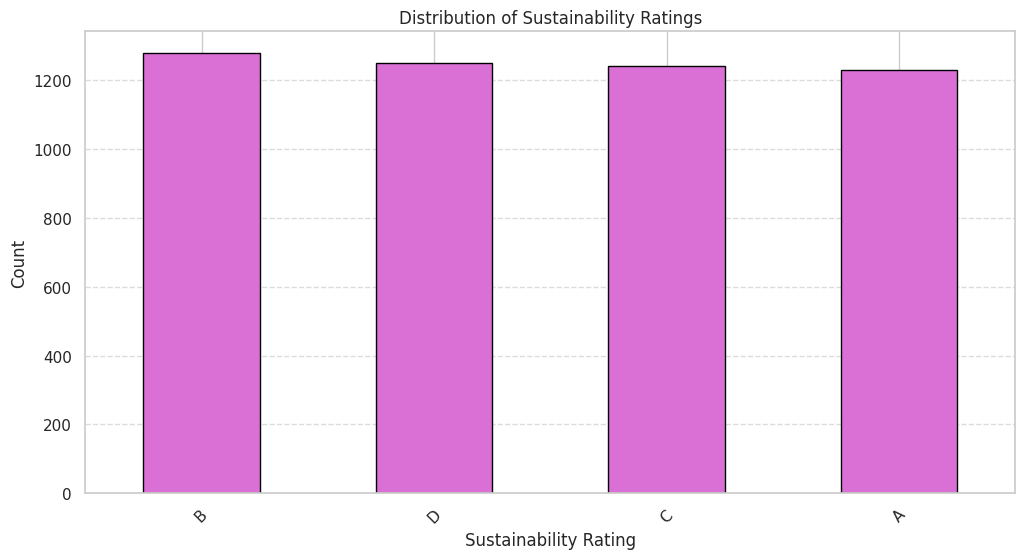

In [1836]:
plt.figure(figsize=(12, 6))
df['Sustainability_Rating'].value_counts().plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Distribution of Sustainability Ratings')
plt.xlabel('Sustainability Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan gambar diatas dapat dilihat bahwa distribusinya cukup merata di semua kategori penilaian. Jumlah merek dengan penilaian A, B, C, dan D hampir sama.

##### **Composition**

Komposisi jenis bahan dengan rating keberlanjutan

<Figure size 1200x600 with 0 Axes>

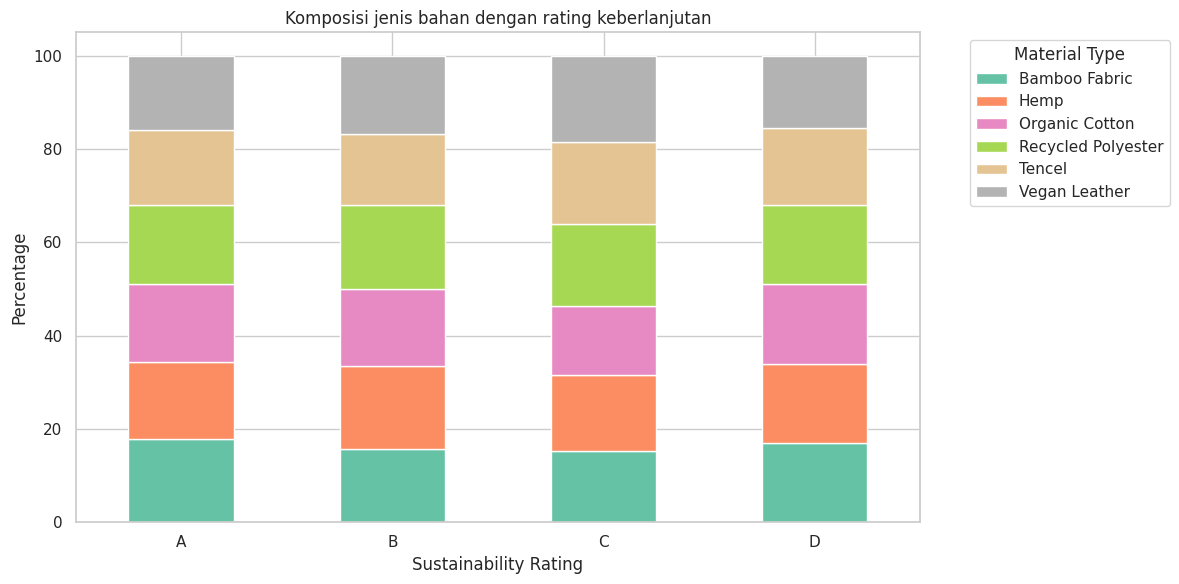

In [1837]:
plt.figure(figsize=(12, 6))
material_data = pd.crosstab(df['Sustainability_Rating'], df['Material_Type'], normalize='index') * 100
material_data.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))
plt.title('Komposisi jenis bahan dengan rating keberlanjutan')
plt.xlabel('Sustainability Rating')
plt.ylabel('Percentage')
plt.legend(title='Material Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Visualisasi diatas menampilkan bahwa jenis bahan mempengaruhi rating keberlanjutan produk.Bamboo Fabric dan Recycled Polyester lebih sering ditemukan pada produk dengan rating A dan B, yang berarti bahan-bahan ini lebih ramah lingkungan. Vegan Leather mungkin ditemukan lebih banyak pada produk dengan rating D, yang bisa mengindikasikan bahwa bahan ini memiliki dampak lingkungan yang lebih besar.

##### **Relationship**

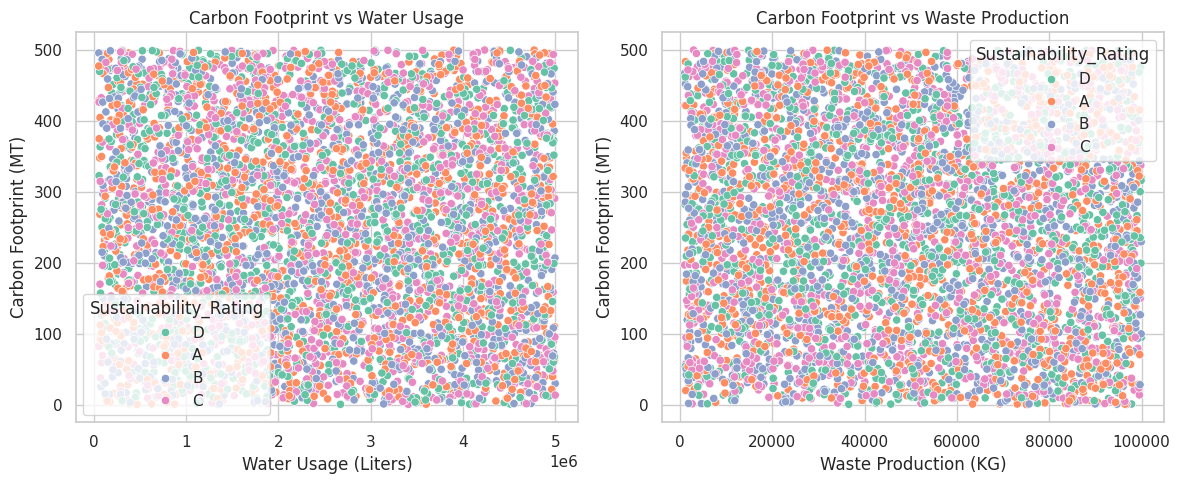

In [1838]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df ,
    x="Water_Usage_Liters",
    y="Carbon_Footprint_MT",
    hue="Sustainability_Rating",
    palette="Set2"
)
plt.title("Carbon Footprint vs Water Usage")
plt.xlabel("Water Usage (Liters)")
plt.ylabel("Carbon Footprint (MT)")

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x="Waste_Production_KG",
    y="Carbon_Footprint_MT",
    hue="Sustainability_Rating",
    palette="Set2"
)
plt.title("Carbon Footprint vs Waste Production")
plt.xlabel("Waste Production (KG)")
plt.ylabel("Carbon Footprint (MT)")

plt.tight_layout()
plt.show()


Hubungan antara Carbon Footprint dan Water Usage dilihat dari visualisasi adanya korelasi positif lemah. Semakin besar penggunaan air, cenderung jejak karbon juga meningkat. Tapi datanya cukup tersebar, artinya tidak semua brand mengikuti pola yang sama.

Hubungan antara Carbon Footprint dan Waste Production terlihat lebih jelas. Yaitu semakin besar produksi limbah, makin besar pula jejak karbonnya. Artinya, pengurangan limbah bisa menjadi strategi penting untuk menurunkan emisi karbon.

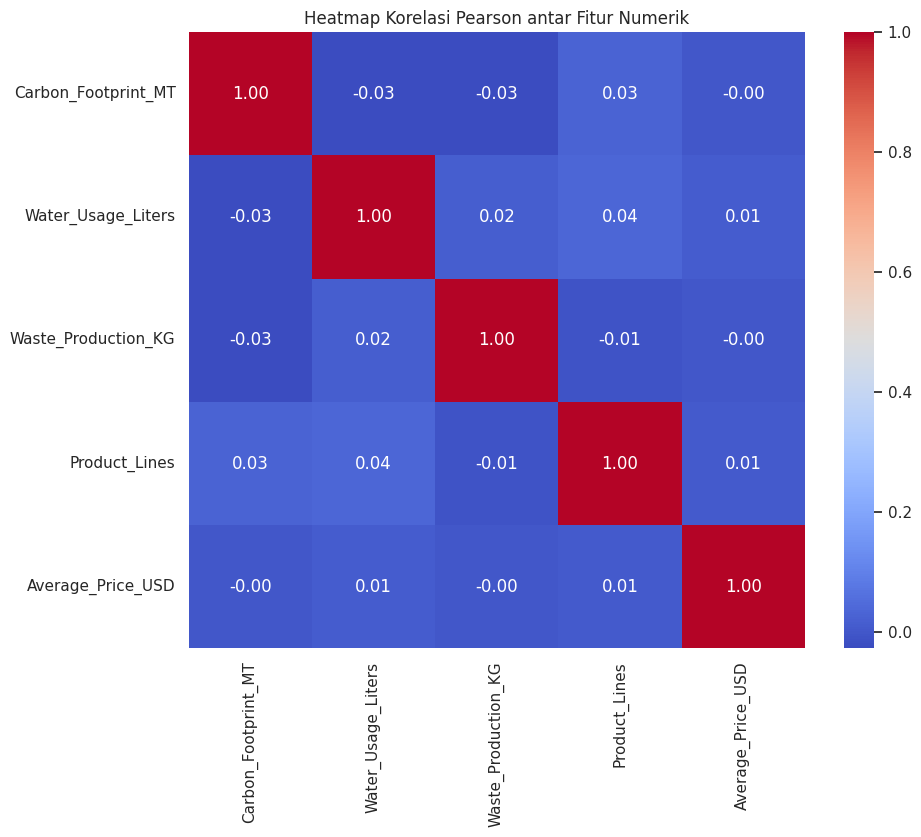

,Carbon_Footprint_MT
Carbon_Footprint_MT,1.000000
Product_Lines,0.028276
Average_Price_USD,-0.001673
Water_Usage_Liters,-0.026769
Waste_Production_KG,-0.027488


In [1839]:
numeric_cols = df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Product_Lines', 'Average_Price_USD']]
correlation_matrix = numeric_cols.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi Pearson antar Fitur Numerik")
plt.show()

correlation_matrix['Carbon_Footprint_MT'].sort_values(ascending=False)


Dari heatmap dan nilai korelasi:

Carbon_Footprint_MT tidak memiliki korelasi kuat dengan fitur numerik lainnya.

Korelasi tertinggi adalah dengan Product_Lines, tetapi hanya 0.028 (sangat lemah).

Korelasi dengan Water_Usage_Liters dan Waste_Production_KG juga sangat rendah (sekitar -0.027).

Artinya, jejak karbon tampaknya tidak berhubungan langsung secara linear dengan penggunaan air, produksi limbah, atau variabel numerik lainnya di dataset ini.

##### **Comparison**

<ipython-input-1840-bf2ef7b97aea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


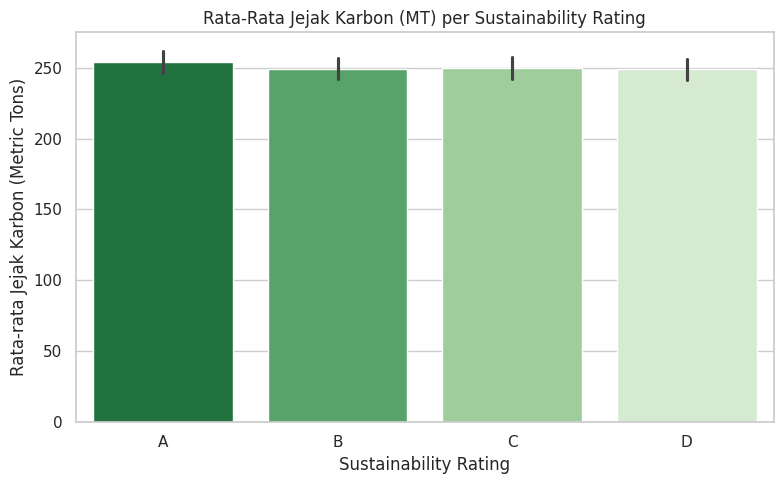

In [1840]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.barplot(
    data=df ,
    x="Sustainability_Rating",
    y="Carbon_Footprint_MT",
    order=["A", "B", "C", "D"],
    palette="Greens_r"
)

plt.title("Rata-Rata Jejak Karbon (MT) per Sustainability Rating")
plt.xlabel("Sustainability Rating")
plt.ylabel("Rata-rata Jejak Karbon (Metric Tons)")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas brand dengan Rating A memiliki jejak karbon paling rendah Semakin rendah rating (B → C → D), rata-rata emisi karbon meningkat. Ini menandakan bahwa rating keberlanjutan berkorelasi langsung dengan emisi karbon.

<ipython-input-1841-caec99b9ed80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


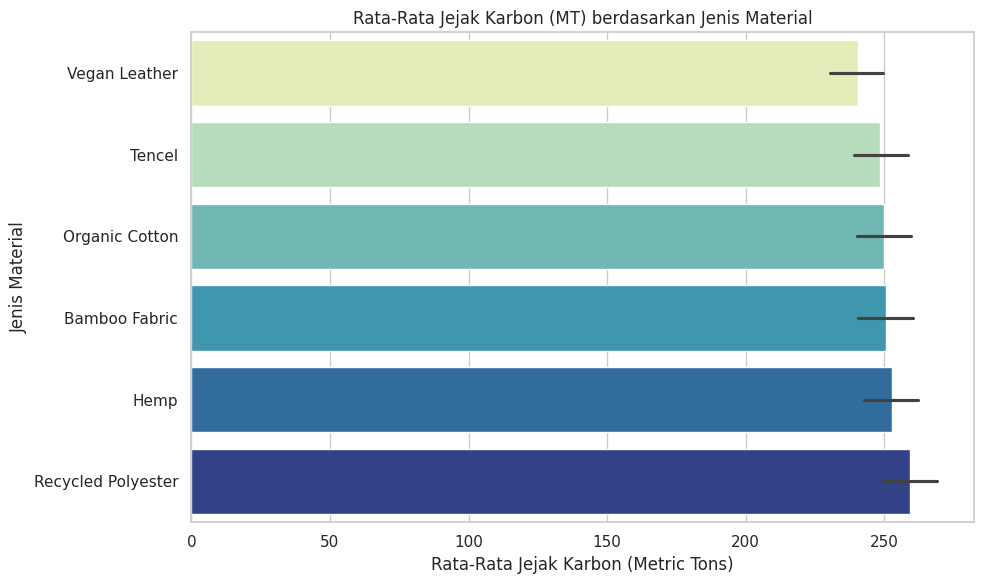

In [1841]:
plt.figure(figsize=(10, 6))

order = df.groupby("Material_Type")["Carbon_Footprint_MT"].mean().sort_values().index

sns.barplot(
    data=df,
    x="Carbon_Footprint_MT",
    y="Material_Type",
    order=order,
    palette="YlGnBu"
)

plt.title("Rata-Rata Jejak Karbon (MT) berdasarkan Jenis Material")
plt.xlabel("Rata-Rata Jejak Karbon (Metric Tons)")
plt.ylabel("Jenis Material")
plt.tight_layout()
plt.show()


Berdasarkan hasil visualisasi, material yang menghasilkan jejak karbon paling banyak adalah material Recycled Polyester dan material yang menghasilkan jejak karbon paling sedikit adalah Vegan Leather.

### **Verify Data Quality**

##### **Missing Values**

In [1842]:
(df.isna().sum() / len(df)) * 100

,0
Brand_ID,0.00
Brand_Name,0.00
Country,0.00
Year,0.00
Sustainability_Rating,0.00
Material_Type,0.00
Eco_Friendly_Manufacturing,0.00
Carbon_Footprint_MT,0.00
Water_Usage_Liters,0.00
Waste_Production_KG,0.00


Terdapat nilai kosong pada kolom Certifications yaitu sebanyak 20.08%.

In [1843]:
df[df['Certifications'].isnull()]

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
9,BRAND-0010,Brand_10,India,2011,A,Bamboo Fabric,No,250.94,3892548.66,58636.15,No,9,426.55,Stable,NaN
11,BRAND-0012,Brand_12,UK,2015,C,Hemp,No,122.81,2563102.30,44827.29,Yes,10,436.95,Stable,NaN
12,BRAND-0013,Brand_13,Japan,2024,A,Hemp,No,413.27,3162662.08,2507.82,No,20,437.23,Stable,NaN
16,BRAND-0017,Brand_17,Germany,2011,A,Bamboo Fabric,Yes,45.07,4448039.39,34738.56,Yes,9,148.35,Growing,NaN
19,BRAND-0020,Brand_20,Australia,2018,C,Hemp,Yes,437.75,2345334.52,96370.47,No,16,134.28,Growing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,BRAND-4989,Brand_4989,France,2024,B,Vegan Leather,No,29.52,3250586.27,22674.73,Yes,19,159.92,Stable,NaN
4990,BRAND-4991,Brand_4991,UK,2021,D,Hemp,No,368.89,4692971.70,63835.83,No,5,317.02,Growing,NaN
4995,BRAND-4996,Brand_4996,Brazil,2010,A,Organic Cotton,Yes,423.73,251736.61,50532.28,No,1,490.95,Stable,NaN
4997,BRAND-4998,Brand_4998,Japan,2023,D,Vegan Leather,Yes,321.12,317800.67,81467.21,Yes,12,431.32,Stable,NaN


Menampilkan baris yang memiliki data kosong pada kolom Certifications

In [1844]:
df['Certifications'].dropna().describe()

,Certifications
count,3996
unique,4
top,GOTS
freq,1050


* Count: Dari 5.000 baris nilai, hanya 3.996 brand yang mencantumkan informasi sertifikasi. Ada 1.004 nilai kosong (missing values).
* Unique: Kolom ini memiliki empat jenis sertifikasi yaitu 'GOTS' 'B Corp' 'OEKO-TEX' 'Fair Trade'.
* Top: Sertifikasi GOTS adalah nilai yang paling sering muncul.
* Freq: GOTS muncul sebanyak 1.050 kali dari total 3.996 data yang tersedia.

#####**Outliers Values**

In [1845]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year,0.0
Carbon_Footprint_MT,0.0
Water_Usage_Liters,0.0
Waste_Production_KG,0.0
Product_Lines,0.0
Average_Price_USD,0.0


Kode ini mengevaluasi outlier pada setiap kolom numerik. Outlier dihitung menggunakan metode IQR yaitu menghitung  selisih antar kuartil. Outlier 0% pada setiap kolom artinya semua nilai dalam kolom berada dalam rentang normal

#####**Duplicated Values**

In [1846]:
df[df.duplicated()]

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications


Dilakukan pengecekkan nilai duplikat lalu didapatkan bahwa dataset tidak memiliki nilai duplikat

# **Data Preparation**

### **Data Cleaning**

##### **Handling Missing Values**

In [1847]:
df['Certifications'] = df['Certifications'].fillna('Unknown')

Karena kolom ini bersifat kategorikal, bukan numerik maka untuk mengatasi missing value kolom yang kosong diisi dengan kategori Certifications 'unknown'

##### **Handling Duplicated Data**

In [1848]:
df[df.duplicated()]

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications


Karena dataset ini tidak memiliki nilai duplikat maka tidak perlu dilakukan penanganan data duplikat

##### **Handling Outliers Value**

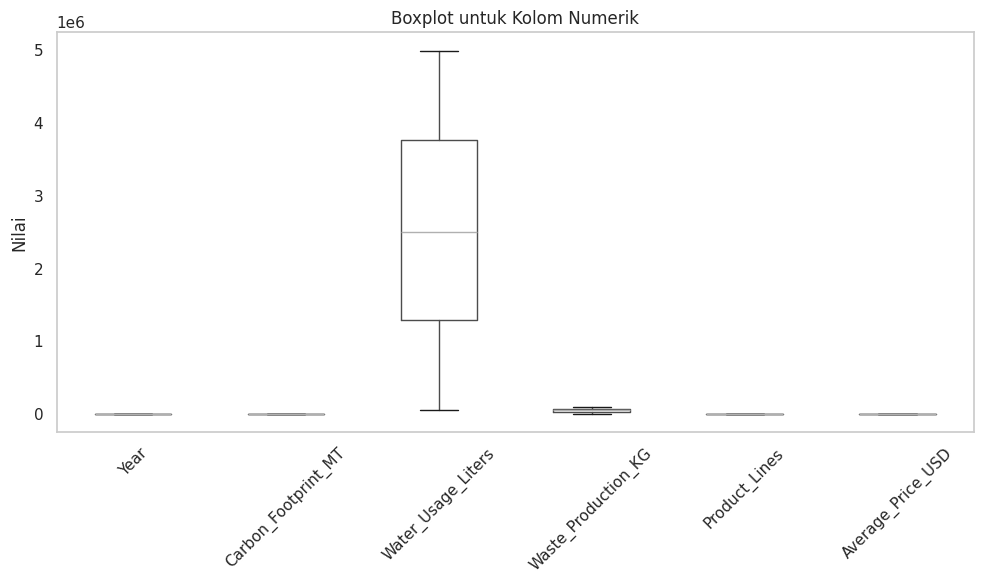

In [1849]:
df_box = df.drop(['Brand_ID', 'Brand_Name', 'Country', 'Material_Type', 'Eco_Friendly_Manufacturing', 'Certifications', 'Sustainability_Rating', 'Recyling_Programs', 'Market_Trend'], axis=1, errors='ignore')

boxplot = df_box.boxplot(grid=False, rot=45, figsize=(10, 6))
plt.title("Boxplot untuk Kolom Numerik")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Setiap kolom tidak memiliki outlier artinya semua nilai dalam kolom berada dalam rentang normal

##### **Pengecekkan Hasil**

1. Cek Missing Value

In [1850]:
(df.isna().sum() / len(df)) * 100

,0
Brand_ID,0.0
Brand_Name,0.0
Country,0.0
Year,0.0
Sustainability_Rating,0.0
Material_Type,0.0
Eco_Friendly_Manufacturing,0.0
Carbon_Footprint_MT,0.0
Water_Usage_Liters,0.0
Waste_Production_KG,0.0


Sudah tidak ada nilai kosong

2. Cek Data Duplikat

In [1851]:
df[df.duplicated()]

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications


Sudah tidak ada data yang duplikat

3. Cek Outliers Value

In [1852]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year,0.0
Carbon_Footprint_MT,0.0
Water_Usage_Liters,0.0
Waste_Production_KG,0.0
Product_Lines,0.0
Average_Price_USD,0.0


Semua nilai dalam rentang normal

### **Construct Data**

##### **Feature Engineering**

In [1853]:
def categorize_material(material):
    natural_materials = ['Hemp', 'Organic Cotton']
    semi_materials = ['Tencel', 'Bamboo Fabric']

    if material in natural_materials:
        return 'Natural'
    elif material in semi_materials:
        return 'Semi-Synthetic'
    else:
        return 'Synthetic'

df['Material_Category'] = df['Material_Type'].apply(categorize_material)

Kode ini digunakan untuk mengategorikan bahan produk fashion berdasarkan apakah bahan tersebut natural atau synthetic.

In [1854]:
def categorize_certifications(certi):
    certifications_type = ['B Corp', 'Fair Trade', 'GOTS', 'OEKO-TEX']

    if certi in certifications_type:
        return 'Yes'
    else:
        return 'No'

df['Has_Certifications'] = df['Certifications'].apply(categorize_certifications)

Kode ini secara otomatis memeriksa kolom Certifications untuk setiap produk dan memberi label 'Yes' atau 'No' di kolom baru Has_Certifications, tergantung pada apakah produk memiliki sertifikasi yang termasuk dalam daftar ['B Corp', 'Fair Trade', 'GOTS', 'OEKO-TEX'] atau tidak.

##### **Pengecekkan Hasil**

In [1855]:
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications,Material_Category,Has_Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS,Semi-Synthetic,Yes
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS,Synthetic,Yes
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp,Synthetic,Yes
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX,Semi-Synthetic,Yes
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade,Semi-Synthetic,Yes


### **Data Reduction**

In [1856]:
df_reduced = df.drop(columns=["Brand_ID", "Brand_Name","Country", "Year","Product_Lines", "Average_Price_USD", "Market_Trend"])

Mengurangi fitur/kolom yang kurang relevan dengan tujuan dari analisis ini yaitu untuk memprediksi rating keberlanjutan suatu produk fashion berdasarkan jenis bahan dan limbah/jejak karbon hasil produksi.

##### **Pengecekkan Hasil**

In [1857]:
df_reduced.head()

,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Certifications,Material_Category,Has_Certifications
0,D,Tencel,No,1.75,4511152.79,97844.11,No,GOTS,Semi-Synthetic,Yes
1,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,GOTS,Synthetic,Yes
2,A,Vegan Leather,No,336.66,467454.52,38385.92,No,B Corp,Synthetic,Yes
3,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,OEKO-TEX,Semi-Synthetic,Yes
4,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,Fair Trade,Semi-Synthetic,Yes


**Saving data**

In [1858]:
df.to_csv('Data_Cleaned.csv', index=False)

menyimpan data yang telah di cleaning

### **Data Transformation**

##### **Mapping**

In [1859]:
df_reduced["Eco_Friendly_Manufacturing"] =df_reduced["Eco_Friendly_Manufacturing"].map({"Yes": 1, "No": 0})
df_reduced["Recycling_Programs"] = df_reduced["Recycling_Programs"].map({"Yes": 1, "No": 0})
df_reduced["Sustainability_Rating"] = df_reduced["Sustainability_Rating"].map({'A': 3, 'B': 2, 'C': 1, 'D': 0})
df_reduced["Material_Category"] = df_reduced["Material_Category"].map({"Natural": 2,"Semi-Synthetic": 1, "Synthetic": 0})
df_reduced["Has_Certifications"] = df_reduced["Has_Certifications"].map({"Yes": 1, "No": 0})

Mengubah kolom yang merupakan kolom kategorikal menjadi kolom yang berisi nilai numerik

In [1860]:
df = df_reduced.drop(columns=["Certifications", "Material_Type"])

Kolom "Material_Type", dan "Certifications" dihapus karena sudah di mapping sebelumnya, maka kolom aslinya sudah tidak dibutuhkan.



In [1861]:
df.head()

,Sustainability_Rating,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Material_Category,Has_Certifications
0,0,0,1.75,4511152.79,97844.11,0,1,1
1,0,1,124.39,1951566.31,37267.75,0,0,1
2,3,0,336.66,467454.52,38385.92,0,0,1
3,0,0,152.04,899576.90,32665.45,0,1,1
4,0,1,415.63,1809219.90,37295.47,1,1,1


Data diatas adalah data yang sudah di transformasi dan semua kolom berupa numerik dan siap untuk diproses oleh model machine learning

### **Saving Data**

In [1862]:
df.to_csv('Final_Data.csv', index=False)

Menyimpan Hasil Data Preparation

#**Modelling**

###**Select Modelling Techniques**

Dalam proyek ini, digunakan tiga model klasifikasi yaitu Gaussian Naive Bayes (GNB), K-Nearest Neighbor (KNN), dan Decision Tree. Pemilihan ketiga model ini didasarkan pada karakteristik data serta tujuan bisnis yang ingin dicapai, yaitu memprediksi rating keberlanjutan produk fashion berdasarkan karakteristik bahan dan proses produksinya.

#####**Gaussian Naive Bayes**

Proyek ini menggunakan model Gaussian Naive Bayes karena dapat menangani data numerik yang telah dinormalisasi, serta efisiensinya dalam membangun model prediktif. Dalam konteks industri fashion, GNB dapat membantu mengidentifikasi tren umum dalam karakteristik produk yang cenderung menghasilkan rating keberlanjutan tinggi.

#####**K-Nearest Neighbor**

Model K-Nearest Neighbor bekerja dengan prinsip kemiripan antar data. Dengan menggunakan KNN, rating keberlanjutan suatu produk diprediksi berdasarkan produk lain yang memiliki karakteristik serupa.

#####**Decision Tree**

Decision Tree merupakan model yang mudah dipahami karena hasilnya dapat divisualisasikan dalam bentuk pohon keputusan. Decision Tree dapat menunjukkan bahwa kombinasi tertentu dari penggunaan bahan ramah lingkungan, program daur ulang, dan tingkat emisi karbon rendah cenderung menghasilkan rating A atau B. Jadi, model ini tidak hanya memberikan prediksi, tetapi juga dapat digunakan sebagai panduan dalam penyusunan strategi produksi yang berkelanjutan.

###**Pre-Processing**

Inisiasi Variabel untuk menyimpan Dataframe

In [1863]:
df.head()

,Sustainability_Rating,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Material_Category,Has_Certifications
0,0,0,1.75,4511152.79,97844.11,0,1,1
1,0,1,124.39,1951566.31,37267.75,0,0,1
2,3,0,336.66,467454.52,38385.92,0,0,1
3,0,0,152.04,899576.90,32665.45,0,1,1
4,0,1,415.63,1809219.90,37295.47,1,1,1


#####**Split Data**

In [1864]:
x = df.drop('Eco_Friendly_Manufacturing', axis=1)
y = df['Eco_Friendly_Manufacturing']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Membuat variabel x yang berisi semua kolom dari df_data, kecuali kolom Eco_Friendly_Manufacturing dan membuat variabel y yaitu output yang ingin di prediksi (Eco_Friendly_Manufacturing). Setelah itu data dibagi menjadi rasio 8:2 yaitu 20% data test dan 80% data train.

In [1865]:
y_train.shape

(4000,)

Jumlah Data train yang ada yaitu terdapat 4000 baris

#####**Normalisasi Data**

In [1866]:
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

Normalisasi data dilakukan untuk mengubah nilai-nilai dari fitur-fitur dalam suatu dataset sehingga memiliki skala yang seragam. Dengan melakukan normalisasi, rentang nilai dari setiap fitur akan diubah menjadi 0 hingga 1, yang mempermudah pemrosesan dan analisis data.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [1867]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Kode tersebut digunakan untuk membuat model Gaussian Naive Bayes (GNB) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train).

#####**K-Nearest Neighbor**

In [1868]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode ini digunakan untuk membuat model K-Nearest Neighbors (KNN) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

#####**Decision Tree**

In [1869]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode tersebut digunakan untuk membuat model Decision Tree Classifier (DTC) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

###**Begins and Compare Predict**

In [1870]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [1871]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [1872]:
combined_data.head()

,Sustainability_Rating,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Material_Category,Has_Certifications,Eco_Friendly_Manufacturing,gnb_prediction,knn_prediction,dtc_prediction
0,2,283.21,3877946.89,81550.67,0,2,1,1,1,1,1
1,1,144.69,1794898.18,60101.62,0,0,0,1,0,1,1
2,2,173.54,1973284.23,65407.43,0,0,1,0,1,1,0
3,0,171.66,3675602.79,30071.43,0,1,1,1,1,1,0
4,0,126.01,4584379.60,73934.28,1,2,1,0,1,0,1


Dapat dilihat dari hasil prediksi model masih menunjukkan prediksi yang kurang akurat

#**Evaluation**

##**Evaluate Results**

In [1873]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from sklearn.model_selection import (
    cross_val_score,
    KFold,
    TimeSeriesSplit,
    GridSearchCV
)

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE

klasifikasi

In [1874]:
# Terapkan SMOTE pada data pelatihan untuk menangani kelas yang tidak seimbang
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Latih model dengan data yang sudah di-resample
gnb.fit(X_train_resampled, y_train_resampled)
knn.fit(X_train_resampled, y_train_resampled)
dtc.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan data uji
gnb_pred = gnb.predict(x_test)
knn_pred = knn.predict(x_test)
dtc_pred = dtc.predict(x_test)

# Cek akurasi setelah SMOTE
print("Akurasi setelah SMOTE:")
print("Gaussian Naive Bayes:", accuracy_score(y_test, gnb_pred))
print("K-Nearest Neighbor:", accuracy_score(y_test, knn_pred))
print("Decision Tree:", accuracy_score(y_test, dtc_pred))

Akurasi setelah SMOTE:
Gaussian Naive Bayes: 0.517
K-Nearest Neighbor: 0.51
Decision Tree: 0.501


**Confussion Matrics**

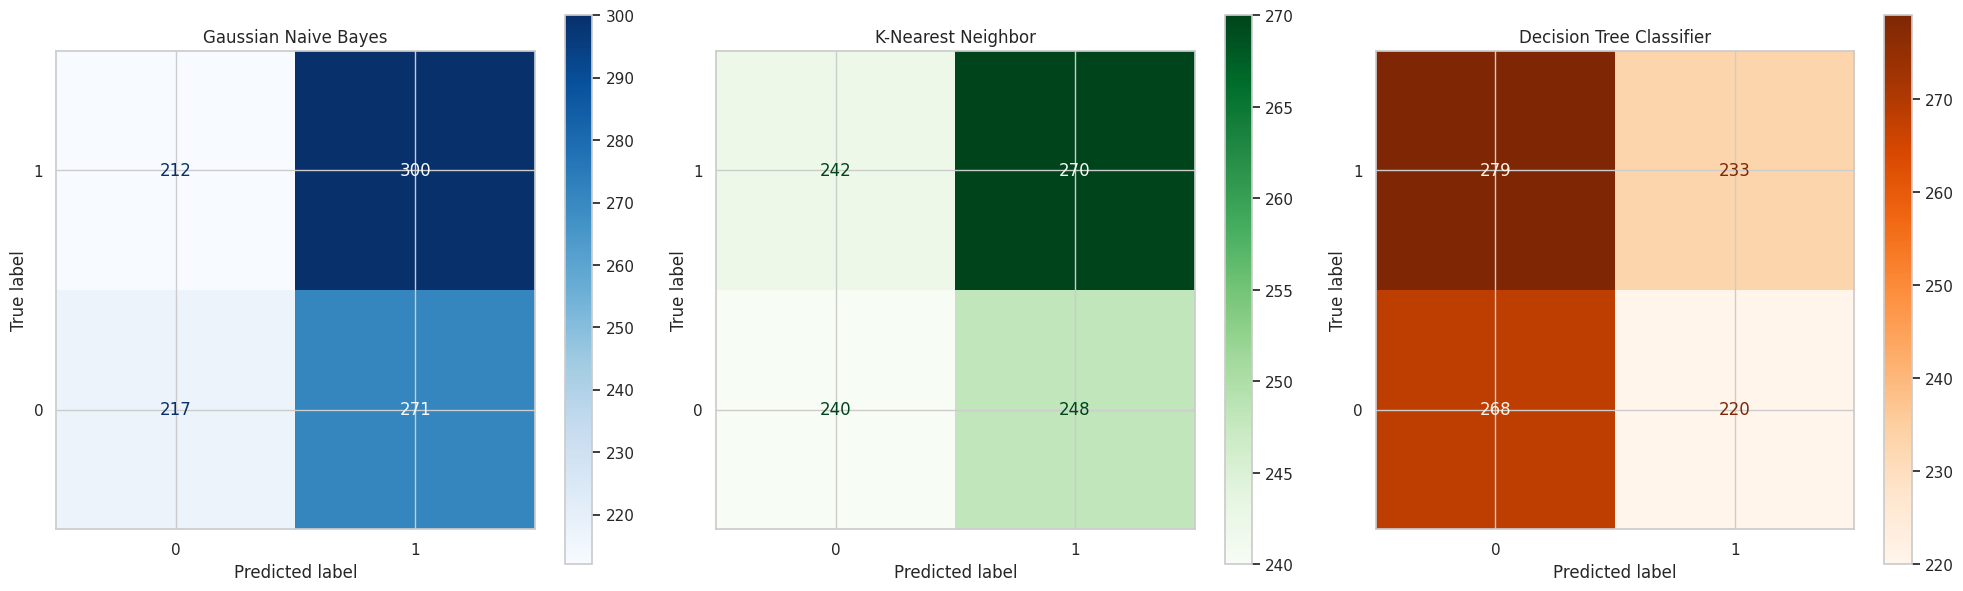

In [1875]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='Blues')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")
gnb_cm_display.ax_.invert_yaxis()

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='Greens')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")
knn_cm_display.ax_.invert_yaxis()

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='Oranges')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")
dtc_cm_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()

1. Gaussian Naive Bayes (GNB):

  * True Positives (TP): 212 (produk positif yang diprediksi dengan benar).

  * False Positives (FP): 300 (produk negatif yang diprediksi sebagai positif).

  * False Negatives (FN): 217 (produk positif yang diprediksi sebagai negatif).

  * True Negatives (TN): 271 (produk negatif yang diprediksi dengan benar).

2. K-Nearest Neighbors (KNN):

  * True Positives (TP): 242 (produk positif yang diprediksi dengan benar).

  * False Positives (FP): 270 (produk negatif yang diprediksi sebagai positif).

  * False Negatives (FN): 240 (produk positif yang diprediksi sebagai negatif).

  * True Negatives (TN): 248 (produk negatif yang diprediksi dengan benar).

3. Decision Tree
  * True Positives (TP): 279 (produk positif yang diprediksi dengan benar).

  * False Positives (FP): 233 (produk negatif yang diprediksi sebagai positif).

  * False Negatives (FN): 268 (produk positif yang diprediksi sebagai negatif).

  * True Negatives (TN): 220 (produk negatif yang diprediksi dengan benar).

In [1876]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metrics = {
    "GaussianNB": {
        "Accuracy": accuracy_score(y_test, gnb_pred),
        "Precision": precision_score(y_test, gnb_pred, average='macro', zero_division=1),
        "Recall": recall_score(y_test, gnb_pred, average='macro', zero_division=1),
        "F1-Score": f1_score(y_test, gnb_pred, average='macro', zero_division=1)
    },
    "KNN": {
        "Accuracy": accuracy_score(y_test, knn_pred),
        "Precision": precision_score(y_test, knn_pred, average='macro', zero_division=1),
        "Recall": recall_score(y_test, knn_pred, average='macro', zero_division=1),
        "F1-Score": f1_score(y_test, knn_pred, average='macro', zero_division=1)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, dtc_pred),
        "Precision": precision_score(y_test, dtc_pred, average='macro', zero_division=1),
        "Recall": recall_score(y_test, dtc_pred, average='macro', zero_division=1),
        "F1-Score": f1_score(y_test, dtc_pred, average='macro', zero_division=1)
    }
}

metrics_df = pd.DataFrame(metrics).T

metrics_df.style.format("{:.7f}").highlight_max(color='green', axis=0)

,Accuracy,Precision,Recall,F1-Score
GaussianNB,0.5170000,0.5156108,0.5153048,0.5136495
KNN,0.5100000,0.5095804,0.5095735,0.5095586
Decision Tree,0.5010000,0.5021470,0.5021292,0.5003880


Model terbaik berdasarkan hasil evaluasi adalah Gaussian Naive Bayes (GaussianNB) karena memiliki akurat, precision, recall, dan F1-score tertinggi di antara ketiga model.

Meskipun GaussianNB menunjukkan performa ter
baik, semua model menunjukkan performa yang relatif rendah dengan akurasi di bawah 60%, yang menunjukkan perlu peningkatan performa.

##**Review Process**

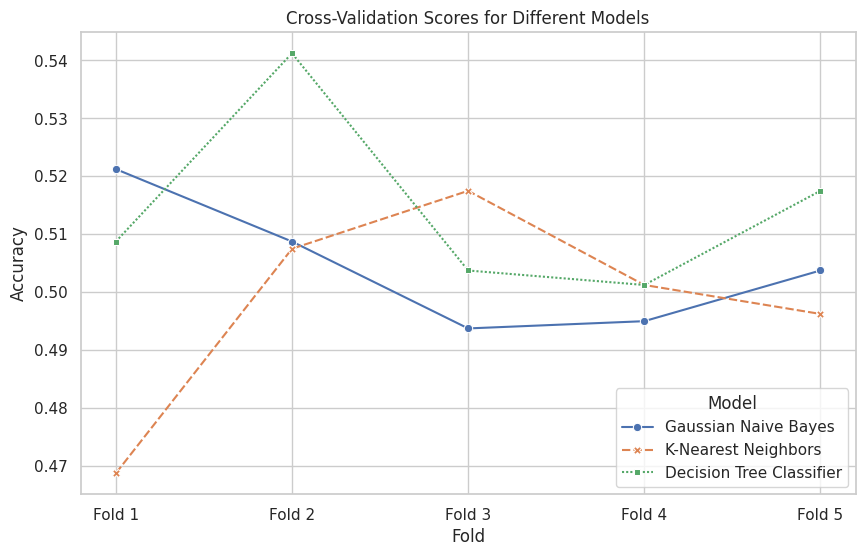

In [1877]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Setelah dilakukan validasi silang maka didpatkan hasil:
  * Gaussian Naive Bayes memiliki akurasi yang paling stabil, dengan nilai rata-rata sekitar 0.52 di seluruh folds.
  * KNN memiliki performa yang bervariasi, tetapi meningkat di fold-fold tertentu.
  * Decision Tree menunjukkan variasi besar, dengan performa terbaik di Fold 4 dan 5.

##**Feature Selection**

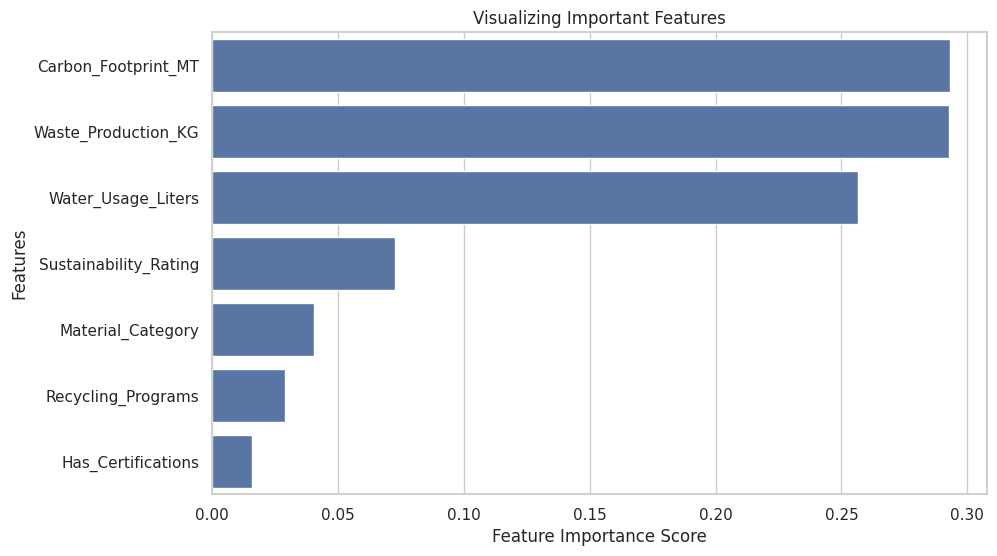

In [1878]:
feature_imp = pd.Series(dtc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Dapat dilihat bahwa fitur yang paling berpengaruh adalah waste production, water usage dan carbon footprint

##**Tuning Hyperparameter**

**Gaussian Naive Bayes**

In [1879]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)
grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': np.float64(0.1873817422860384)}
Akurasi sebelum tuning: 0.488
Akurasi setelah tuning: 0.513


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Peningkatan akurasi sebesar 0.025 (dari 48.8% ke 51.3%) menunjukkan bahwa tuning parameter berhasil memberikan peningkatan performa pada model. Walaupun peningkatannya tidak sangat signifikan, ini menunjukkan bahwa model GNB bisa menjadi lebih optimal dengan penggunaan nilai var_smoothing yang lebih tepat.



##**Determine Next Steps**

Berdasarkan hasil evaluasi yang telah dilakukan, disimpulkan bahwa Gaussian Naive Bayes (GNB) menunjukkan performa yang paling stabil dengan akurasi yang relatif konsisten dibandingkan dengan model lainnya. Meskipun akurasi secara keseluruhan berada di bawah 60%, model GNB memiliki kemampuan yang baik dalam memprediksi apakah produk ramah lingkungan atau tidak, dengan prediksi yang relatif lebih seimbang di berbagai fold yang diuji. Model ini juga memberikan hasil yang cukup baik dalam hal precision dan recall, meskipun masih ada ruang untuk perbaikan, terutama dalam mengurangi false positives yang terjadi pada prediksi produk tidak ramah lingkungan.

Selanjutnya, tahapan ini akan dilanjutkan ke deployment, yaitu penerapan model GNB dalam skenario nyata. Pada tahap ini, model akan digunakan untuk memeriksa keberlanjutan produk berdasarkan data yang masuk, yang dapat diterapkan oleh brand atau organisasi terkait dalam penilaian keberlanjutan produk mereka. Dengan penerapan model ini, perusahaan dapat menggunakan rekomendasi otomatis untuk mengidentifikasi produk yang lebih ramah lingkungan, serta memberi saran untuk meningkatkan kualitas dan keberlanjutan produk di masa depan.

#**DEPLOYMENT**

#####**Mandatory: Save Model For Deployment**

In [1882]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


with open("model.pkl", "wb") as f:
    pickle.dump(gnb, f)

Kode di atas digunakan untuk menyimpan model scalar dengan nama scaler.pkl sebagai model yang digunakan untuk melakukan normalisasi input untuk prediksi, hal ini dilakukan karena scalar memerlukan sebuah training agar dapat menjaga rentang nilai tetap stabil ketika data baru akan dinormalisasikan. Model GNB disimpan dengan nama model.pkl yang merupakan model terlatih dan digunakan melakukan prediksi terhadap input data yang sudah dinormalisasi.

###**Plan Deployment**

Implementasi hasil analisis dan pemodelan akan dilakukan dalam dua bentuk utama. Pertama, visualisasi data disajikan melalui Looker Studio dengan menggunakan data yang telah melalui proses data preparation, namun belum dilakukan mapping atau encoding untuk mempertahankan keterbacaan data kategorikal oleh pengguna. Dashboard ini dirancang untuk menyampaikan informasi secara informatif dan mudah dipahami.

Kedua, model prediktif dirilis dalam bentuk layanan RESTful API menggunakan FastAPI. API ini menerima input yang telah dipreproses dan memberikan hasil prediksi secara real-time, sehingga memungkinkan integrasi langsung ke dalam sistem atau aplikasi yang membutuhkan prediksi berbasis data. Tahapan ini menjadi langkah penting dalam memastikan hasil analisis dapat dimanfaatkan secara praktis dan berkelanjutan.

###**Final Report**

Proses implementasi hasil analisis dan pemodelan telah dilakukan, untuk mengakses dashboard visualisasi data dan model prediktif dapat melalui link sebagai berikut:

*   Dashboard:[Dashboard](https://lookerstudio.google.com/reporting/9bf6e6bb-dc6e-43f0-bcf6-b8bcb2f9b37c)
*   API: [FastAPI](http://127.0.0.1:8000/docs#/default/predict_predict_post)
*   Link Screenshot [Hasil FastAPI](https://drive.google.com/drive/folders/18LhPlbP7poaaa3v52hA2nPtBvfLFT5h0?usp=sharing)

###**Review Project**

Adapun slide deck yang merangkum semua hasil analisis yang dilakukan dari tahapan awal hingga akhir dalam bentuk materi presenstasi dengan kesimpulan akhir serta solusi dari permasalahan yang dianalisis dapat diakses melalui link sebagai berikut:

*   Slide Deck: [Sustainability Fashion Prediction](https://www.canva.com/design/DAGlo8HKEUc/nIcr9Z2VUiFsaFKOKctJEA/edit?utm_content=DAGlo8HKEUc&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)